# Python 網路爬蟲實戰研習馬拉松期末目標
- 透過開發者工具觀察網站在列列出 News Feed 這邊是屬於動態網站還是靜態網站，或是有 API 可以直接送 requests
- 根據網站特性選擇 requests / BeautifulSoup / selenium 等工具進行爬蟲整理
- 整理成 pandas.DataFrame 後做簡單的統計可以用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)

In [2]:
# 先安裝scrapy
!pip install scrapy

     |████████████████████████████████| 245kB 3.3MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 2.3MB 53.2MB/s 
     |████████████████████████████████| 174kB 58.7MB/s 
     |████████████████████████████████| 3.2MB 45.3MB/s 
     |████████████████████████████████| 3.1MB 41.8MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp36-none-any.whl size=11515 sha256=e30f8551c45becfd230a759153a54f8358d03f95b3174512ed44ef78bddeb952
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
  Created wheel for protego: filename=Protego-0.1.16-cp36-none-any.whl size=7765 sha256=bc98b7a88302fa458823cb44cec191c862016c264fda44e37cd2faa6a591c48f
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
Successfully built PyDispatcher protego


In [0]:
# 載入scrapy
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.utils.project import get_project_settings

## 目標一、觀察動態網站還是靜態網站
觀察cupoy news是透過API取得資料，如圖：

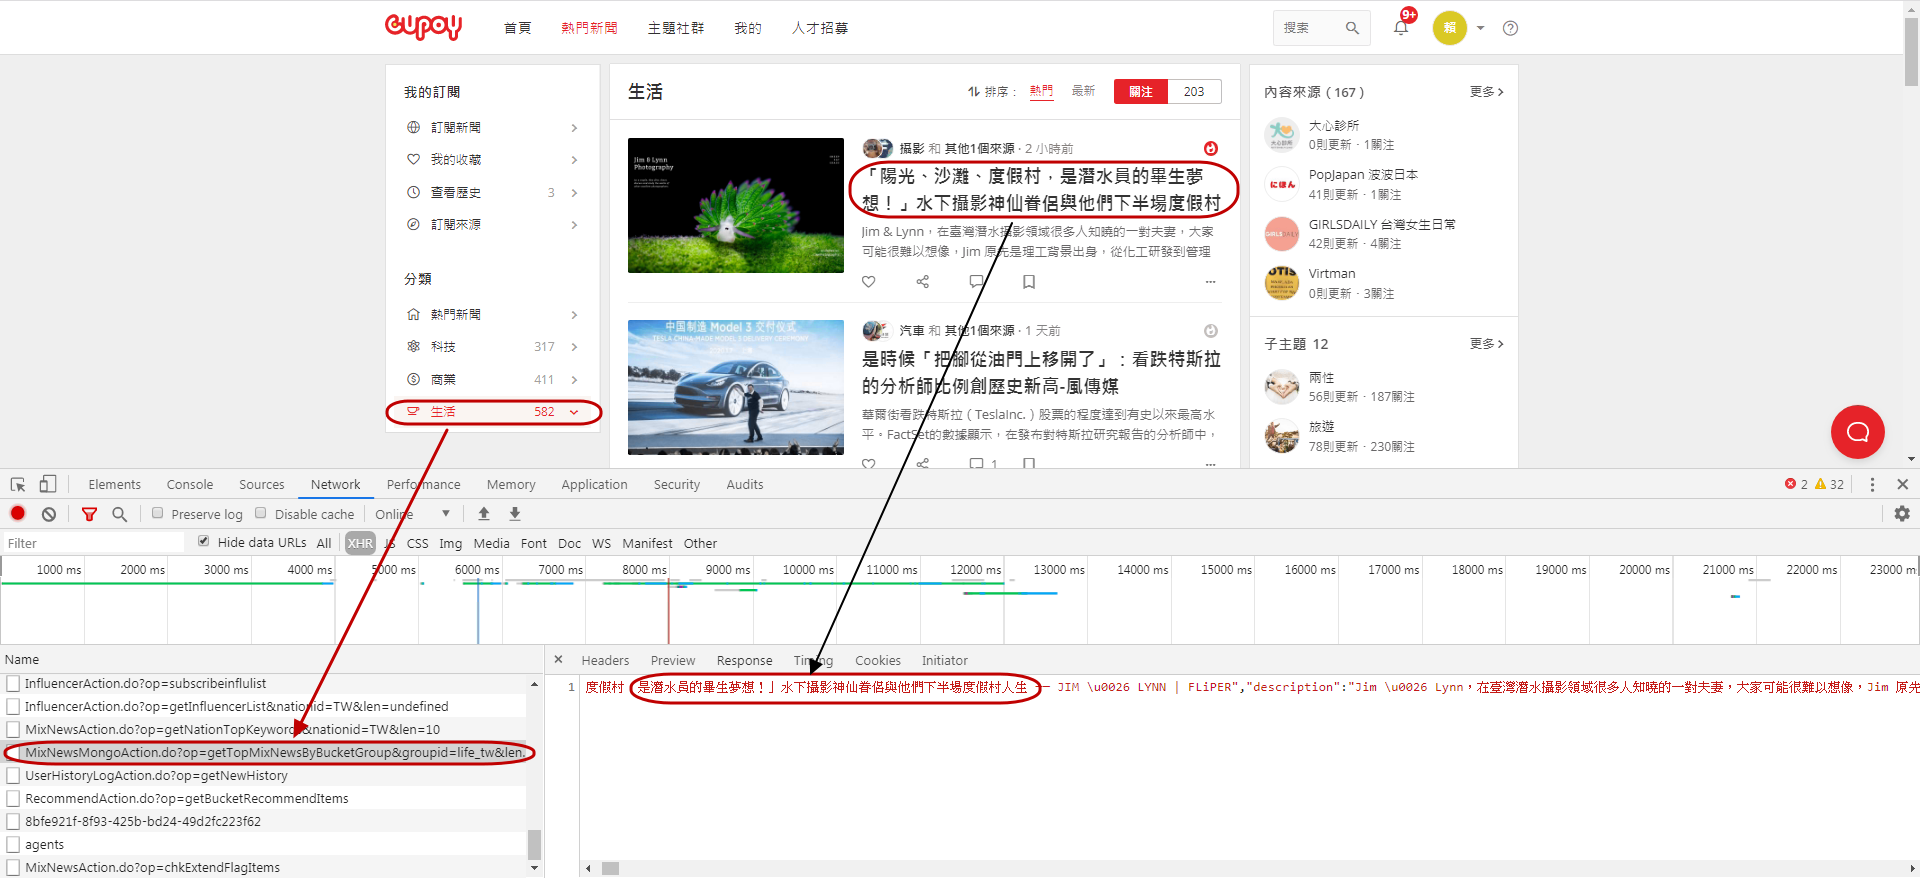

In [14]:
from IPython.display import Image
Image('CupoyNew_life_tw.png', width=1000, height=457)

## 目標二、根據網站特性選擇 requests / BeautifulSoup / selenium 等工具進行爬蟲整理
1. 因為是多網頁的資料，參考Day029的課程，實作crapy抓取資料

In [5]:
process = CrawlerProcess(get_project_settings())
process.crawl('cupoynews', group_id='life_tw')
process.start()

2020-02-18 22:44:33 [scrapy.utils.log] INFO: Scrapy 1.8.0 started (bot: cupoyproject)
2020-02-18 22:44:33 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.10.0, Python 3.6.9 (default, Nov  7 2019, 10:44:02) - [GCC 8.3.0], pyOpenSSL 19.1.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.8, Platform Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
2020-02-18 22:44:33 [scrapy.crawler] INFO: Overridden settings: {'BOT_NAME': 'cupoyproject', 'NEWSPIDER_MODULE': 'cupoyproject.spiders', 'ROBOTSTXT_OBEY': True, 'SPIDER_MODULES': ['cupoyproject.spiders']}
2020-02-18 22:44:33 [scrapy.extensions.telnet] INFO: Telnet Password: e5184c9b56522816
2020-02-18 22:44:33 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-02-18 22:44:33 [scrapy.middleware] INFO: Enabled down

2. 觀察crawled_data目錄是否有正常存在爬取下來的資料

In [6]:
%ls crawled_data

20200218T224433-20200218T224515.json


## 目標三、整理成 pandas.DataFrame 後做簡單的統計可以用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)

### 1. 讀取資料，並裝載至DataFrame

In [8]:
import pandas as pd
import json
data_text = ''
with open('crawled_data/20200218T224433-20200218T224515.json') as f:
    data_text = f.read()
data_json = json.loads(data_text)
data_df = pd.DataFrame(data_json)
data_df.head()

,itemuid,newsid,title,description,linkurl,bucketgrpids,content,author,publish
0,68747470733A2F2F746563686E6577732E74772F323032...,0000017057F4772068747470733A2F2F746563686E6577...,特斯拉自駕電腦領先對手 6 年！日經：ECU 廠遇存亡關頭 | TechNews 科技新報,特斯拉（Tesla Inc.）的汽車銷售量雖遠不如豐田汽車（Toyota Motor）、福斯...,https://technews.tw/2020/02/18/tesla-teardown-...,"[3CExpert_tw, life_tw, tech_tw]",特斯拉（Tesla Inc.）的汽車銷售量雖遠不如豐田汽車（Toyota Motor）、福斯...,,
1,68747470733A2F2F6D616D61636C75622E636F6D2F6C65...,0000017058ECD52868747470733A2F2F6D616D61636C75...,【育兒甘苦談】放學小時光 – 媽媽經｜專屬於媽媽的網站,收藏文章 【育兒甘苦談】放學小時光 文/小米嘛 傍晚跟依比去接姐姐的路上，行經一個騎樓。媽媽...,https://mamaclub.com/learn/%e3%80%90%e8%82%b2%...,"[Babyhome_tw, life_tw]",育兒甘苦談放學小時光 文/小米嘛 傍晚跟依比去接姐姐的路上，行經一個騎樓。媽媽邊走邊在心裡盤...,小米嘛,2020-02-1
2,687474703A2F2F7777772E75706D656469612E6D672F6E...,00000170575D57A0687474703A2F2F7777772E75706D65...,9~15日流感又新增15宗死亡病例 1例A型流感、14例為H1N1,疾管局18日舉行疫情周報記者會，說明國內流感以及腸病毒疫情，疾管署表示，國內新增2名腸病毒重...,http://www.upmedia.mg/news_info.php?SerialNo=8...,"[Babyhome_tw, Fitness_tw, Hedonism_tw, life_tw]",疾管局18日舉行疫情周報記者會，說明國內流感以及腸病毒疫情，疾管署表示，國內新增2名腸病毒重...,,
3,68747470733A2F2F696E666F2E62616279686F6D652E63...,000001700DEF912868747470733A2F2F696E666F2E6261...,聽到口罩、疫情就心慌？心理師5心法陪伴親子安穩共渡肺炎風暴 - BabyHome 新知大耳朵,這個春節，相信對拔麻和孩子們來說都感覺不太一樣。每天聽著新聞報導關於武漢的新型冠狀病毒肺炎的...,https://info.babyhome.com.tw/article/21735?utm...,"[Babyhome_tw, life_tw]",這個春節，相信對拔麻和孩子們來說都感覺不太一樣。每天聽著新聞報導關於武漢的新型冠狀病毒肺炎的...,,
4,68747470733A2F2F6D616D61636C75622E636F6D2F6C65...,0000017058D35DA068747470733A2F2F6D616D61636C75...,從寄生上流看：「媽媽」間的隱性比較 – 媽媽經｜專屬於媽媽的網站,收藏文章 媽媽友是新名詞，舊時代的媽媽友可能單純是孩子同學媽媽之間的交流。現在，可能還在孕育...,https://mamaclub.com/learn/%e5%be%9e%e5%af%84%...,"[Babyhome_tw, life_tw]",媽媽友是新名詞，舊時代的媽媽友可能單純是孩子同學媽媽之間的交流。現在，可能還在孕育寶寶階段的...,Ashlee,2020-02-1


### 2. 觀察新聞分佈的網域
mamaclub.com在Top新聞最多

In [17]:
from pathlib import Path
from urllib.parse import urlparse
text = ''
def save_sitecheck(domain, content):
    dir_path = Path("newsites")
    if not dir_path.exists():
        dir_path.mkdir(parents=True)
    save_path = str(dir_path / '{}_ex.html').format(domain)
    with open(save_path, 'w+', encoding='utf8') as save_file:
        save_file.write(content)

with open('crawled_data/20200218T224433-20200218T224515.json') as file:
    text = file.read()

data = json.loads(text)
domains = {}
for row in data:
    parsed_uri = urlparse(row['linkurl'])
    get_domain = '{uri.netloc}'.format(uri=parsed_uri)
    
    if get_domain not in domains:
        site = {}
        site['domain'] = get_domain
        site['count'] = 0        
        domains[get_domain] = site
    else:
        domains[get_domain]['count'] +=1

for k, site in domains.items():
    print(k, site['count'])

technews.tw 2
mamaclub.com 122
www.upmedia.mg 5
info.babyhome.com.tw 5
pets.ettoday.net 0
photoblog.hk 1
www.edh.tw 24
www.taijimen.org 3
www.niusnews.com 4
www.parenting.com.tw 11
www.family543.com 19
foyuan.idea543.net 13
shopping.parenting.com.tw 2
www.lookforward.cc 21
wealth.businessweekly.com.tw 1
www.commonhealth.com.tw 12
healthylives.tw 6
www.uho.com.tw 8
womany.net 4
meet.bnext.com.tw 1
www.mombaby.com.tw 22
www.mobile01.com 4
mamibuy.com.tw 1
bookzone.cwgv.com.tw 1
www.moneynet.com.tw 0
www.cmmedia.com.tw 0
www.businessweekly.com.tw 1
cn.nytimes.com 1
incar.tw 8
www.hypesphere.com 4
www.beautimode.com 0
mf.techbang.com 2
travel.yam.com 5
www.tssdnews.com.tw 0
autos.udn.com 8
health.udn.com 0
www.foodnext.net 2
www.mplus.com.tw 0
nommagazine.com 0
buzzorange.com 4
www.teepr.com 0
solomo.xinmedia.com 1
travel.ettoday.net 26
www.popdaily.com.tw 2
www.adaymag.com 1
udn.com 1
www.ftchinese.com 0
www.mook.com.tw 0
www.carnews.com 0
www.saydigi.com 0
www.sportsplanetmag.com 0
www.f

### 3. 在scrapy有實作mamaclub文章的爬取，觀察mamaclub的文章是否正常爬取 (content和description內容不一樣)

In [23]:
data_df[data_df['linkurl'].str.contains('mamaclub.com')][['title', 'description', 'content']].head()

,title,description,content
1,【育兒甘苦談】放學小時光 – 媽媽經｜專屬於媽媽的網站,收藏文章 【育兒甘苦談】放學小時光 文/小米嘛 傍晚跟依比去接姐姐的路上，行經一個騎樓。媽媽...,育兒甘苦談放學小時光 文/小米嘛 傍晚跟依比去接姐姐的路上，行經一個騎樓。媽媽邊走邊在心裡盤...
4,從寄生上流看：「媽媽」間的隱性比較 – 媽媽經｜專屬於媽媽的網站,收藏文章 媽媽友是新名詞，舊時代的媽媽友可能單純是孩子同學媽媽之間的交流。現在，可能還在孕育...,媽媽友是新名詞，舊時代的媽媽友可能單純是孩子同學媽媽之間的交流。現在，可能還在孕育寶寶階段的...
5,【嬰幼兒泡澡】skinmellow – 媽媽經｜專屬於媽媽的網站,收藏文章 「當媽媽以後，要處理的事情很多，身體也隨之緊繃，善待自己不是陳腔濫調，而是嘗試在緊...,當媽媽以後，要處理的事情很多，身體也隨之緊繃，善待自己不是陳腔濫調，而是嘗試在緊湊的生活裡...
7,│樂天市場│美食試吃部落客同樂會│超過10種超人氣宅配美食與您同享!!│金月笈食餅舖│耳東家...,收藏文章 │這次很高興能受到樂天市場的邀請，來參加這次的美食部落客同樂會。現場集合超過10種...,這次很高興能受到樂天市場的邀請，來參加這次的美食部落客同樂會。現場集合超過10種超人氣宅配美...
10,妳是我的女神兼寶貝！最會寵妻讓妻的四大星座,老公是不是也非常寵妳呢？\n快來看看有沒有上榜吧😎\n\n--\n人夫寵妻十招，老婆用一生來...,結婚後，夫妻兩個人的關係是非常難處理的，兩個人發生矛盾的時候，有的人會選擇跟對方僵持到底，最...


### 2. 以Group作統計資訊

2020-02-18 22:58:50 [numexpr.utils] INFO: NumExpr defaulting to 2 threads.
2020-02-18 22:58:50 [matplotlib.font_manager] DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-02-18 22:58:50 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
2020-02-18 22:58:50 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
2020-02-18 22:58:50 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-02-18 22:58:50 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-02-18 22:58:50 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2020-02-18 22:58:50 [matplotlib.font_manager] DEBUG

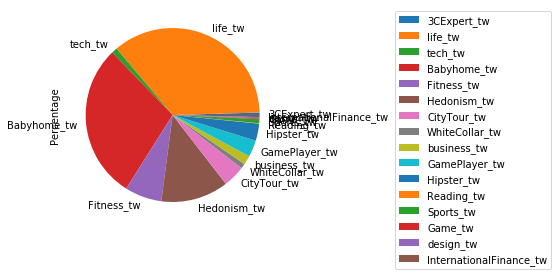

In [9]:
def grpids2columns(df, col):
    tags = {}
    total = len(df.index.values)
    for i in range(len(df[col])):
        cols = df.loc[i, col]
        for grp in cols:
            if grp in tags:
                tags[grp] += 1
            else:
                tags[grp] = 1
    tags_df = pd.DataFrame(tags.items(), columns=['Group', 'Count'])
    tags_df['Percentage'] = tags_df['Count'] / total
    tags_df.set_index('Group', inplace=True)

    return tags_df

stat_df = grpids2columns(data_df, 'bucketgrpids')

plot = stat_df.plot(kind='pie', y='Percentage').legend(bbox_to_anchor=(1.5, 1))